# Picking diverse molecules from a library using fingerprints
* https://www.rdkit.org/docs/GettingStartedInPython.html#picking-diverse-molecules-using-fingerprints
* SimDivPicker
* https://www.rdkit.org/docs/source/rdkit.SimDivFilters.rdSimDivPickers.html

In [1]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

* 압축 파일로 부터 분자를 읽어들임. 

In [2]:
import gzip
fin = gzip.open("./data/actives_5ht3.sdf.gz")
mols = [m for m in Chem.ForwardSDMolSupplier(fin) if m is not None] 

In [3]:
len(mols)

180

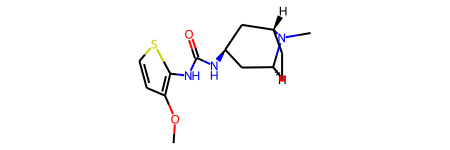

In [4]:
mols[0]

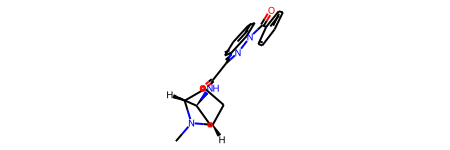

In [5]:
mols[1]

In [6]:
from rdkit.Chem import AllChem

* 분자의 2차원 좌표를 얻는다. 

In [7]:
AllChem.Compute2DCoords(mols[0])

0

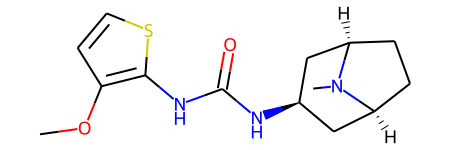

In [8]:
mols[0]

In [9]:
AllChem.Compute2DCoords(mols[1])

0

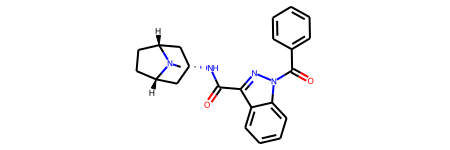

In [10]:
mols[1]

## 이제 180개에서 최대한 다양하게 10개의 분자를 추려내는 방법. 

In [11]:
fps = [GetMorganFingerprint(x,3) for x in mols]

In [12]:
fps[0]

* 어떤 method를 사용할 수 있는지 확인해보자!

In [13]:
dir(fps[0])

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'ToList',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [14]:
fps[0].GetNonzeroElements()

{109296634: 1,
 203749390: 1,
 239295302: 1,
 469168129: 1,
 517457164: 2,
 545884714: 1,
 623728226: 1,
 844521347: 2,
 847961216: 2,
 856755673: 1,
 864674487: 1,
 864942730: 1,
 932712697: 1,
 942896789: 1,
 951226070: 1,
 989543450: 2,
 1135286194: 1,
 1163430439: 2,
 1222399993: 1,
 1510328189: 1,
 1603453351: 1,
 1666679600: 1,
 1693331843: 1,
 1790668568: 1,
 1792562719: 1,
 1831305969: 1,
 1908687668: 1,
 1950701324: 1,
 1962162357: 1,
 2048100777: 1,
 2065023247: 1,
 2076190208: 1,
 2092489639: 1,
 2117068077: 2,
 2246699815: 1,
 2246728737: 2,
 2362918892: 2,
 2442546519: 1,
 2447826885: 1,
 2463614838: 2,
 2512920785: 1,
 2726024602: 1,
 2968968094: 4,
 2976033787: 3,
 2990876263: 1,
 3217380708: 2,
 3218693969: 2,
 3351556771: 1,
 3657471097: 1,
 3683763934: 1,
 3700424527: 1,
 3848368466: 2,
 3914736748: 1,
 3975275337: 1,
 4176566322: 1}

In [15]:
len(fps)

180

In [16]:
def distij(i,j,fps=fps):
...   return 1-DataStructs.DiceSimilarity(fps[i],fps[j]) # 거리 = 1 - 유사도. 

In [17]:
picker = MaxMinPicker() # MaxMinPicker 알고리즘을 수행하는 instance 생성

In [18]:
picker

In [19]:
pickIndices = picker.LazyPick(distij, len(fps), 10, seed=100)

In [20]:
pickIndices

In [21]:
sorted(list(pickIndices))

[6, 12, 41, 57, 97, 99, 130, 137, 151, 158]

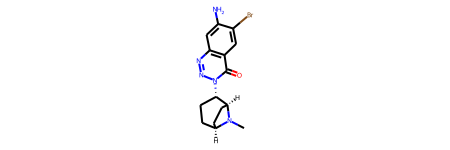

In [22]:
mols[6]

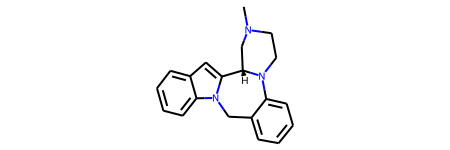

In [23]:
mols[12]

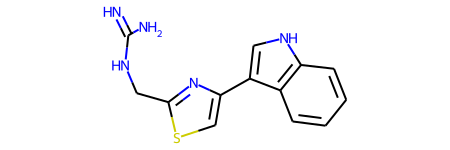

In [24]:
mols[41]

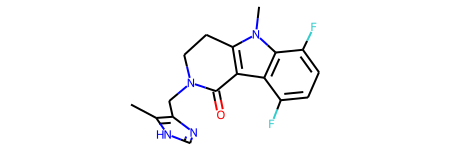

In [25]:
mols[57]

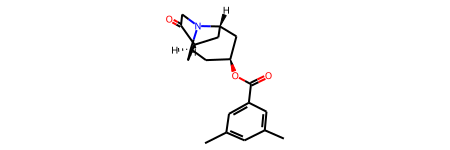

In [26]:
mols[97]

## Display similarity map

In [27]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

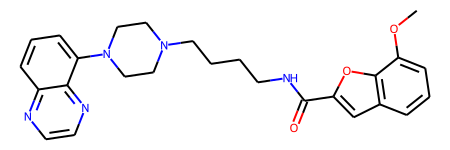

In [28]:
mol

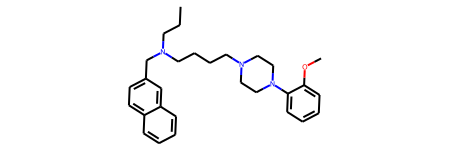

In [29]:
refmol

In [30]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

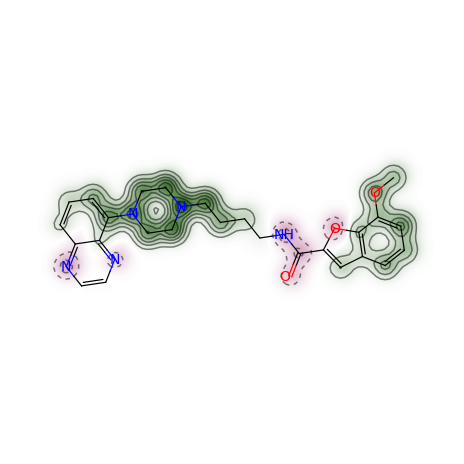

In [31]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)


# Descriptor calculation

* https://www.rdkit.org/docs/GettingStartedInPython.html#descriptor-calculation

Descriptor: 분자의 특정 성질 또는 종합적인 구조/성질을 숫자로 나타내는 것. 

* 두군데의 sub-module에 정의되어 있음: Descriptor / rdMolDescriptor

In [32]:
from rdkit.Chem import Descriptors, rdMolDescriptors

In [33]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

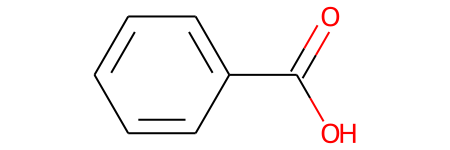

In [34]:
m

In [35]:
Descriptors.TPSA(m) # Total polar surface area (A^2)

37.3

* Descriptors 모듈 안에 존재하는 전체 Method list를 확인

In [36]:
dir(Descriptors)

['AUTOCORR2D_1',
 'AUTOCORR2D_10',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_11',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_12',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_13',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_14',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',


In [37]:
dir(rdMolDescriptors)

['AtomPairsParameters',
 'BCUT2D',
 'CalcAUTOCORR2D',
 'CalcAUTOCORR3D',
 'CalcAsphericity',
 'CalcChi0n',
 'CalcChi0v',
 'CalcChi1n',
 'CalcChi1v',
 'CalcChi2n',
 'CalcChi2v',
 'CalcChi3n',
 'CalcChi3v',
 'CalcChi4n',
 'CalcChi4v',
 'CalcChiNn',
 'CalcChiNv',
 'CalcCoulombMat',
 'CalcCrippenDescriptors',
 'CalcEEMcharges',
 'CalcEccentricity',
 'CalcExactMolWt',
 'CalcFractionCSP3',
 'CalcGETAWAY',
 'CalcHallKierAlpha',
 'CalcInertialShapeFactor',
 'CalcKappa1',
 'CalcKappa2',
 'CalcKappa3',
 'CalcLabuteASA',
 'CalcMORSE',
 'CalcMolFormula',
 'CalcNPR1',
 'CalcNPR2',
 'CalcNumAliphaticCarbocycles',
 'CalcNumAliphaticHeterocycles',
 'CalcNumAliphaticRings',
 'CalcNumAmideBonds',
 'CalcNumAromaticCarbocycles',
 'CalcNumAromaticHeterocycles',
 'CalcNumAromaticRings',
 'CalcNumAtomStereoCenters',
 'CalcNumAtoms',
 'CalcNumBridgeheadAtoms',
 'CalcNumHBA',
 'CalcNumHBD',
 'CalcNumHeavyAtoms',
 'CalcNumHeteroatoms',
 'CalcNumHeterocycles',
 'CalcNumLipinskiHBA',
 'CalcNumLipinskiHBD',
 'Calc

* LogP 계산

In [38]:
Descriptors.MolLogP(m) # 실험값이 아닌 rdkit 에 구현되어 있는 logP 예측 알고리즘을 이용해서 계산

1.3848

In [39]:
Descriptors.BalabanJ(m) # Branch가 얼마나 많은가?를 간접적으로 표현하는 수치. 

2.98145461404113

In [40]:
Descriptors.FractionCSP3(m) # sp3 carbon의 fraction. 

0.0

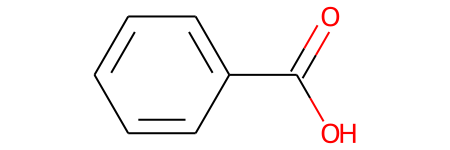

In [41]:
m

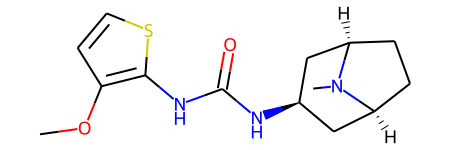

In [42]:
mols[0]

In [43]:
Descriptors.FractionCSP3(mols[0])

0.6428571428571429

In [44]:
Descriptors.FractionCSP3(mols[1])

0.34782608695652173

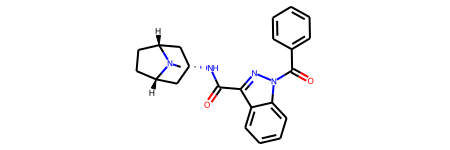

In [45]:
mols[1]

In [46]:
Descriptors.RingCount(mols[0])

3

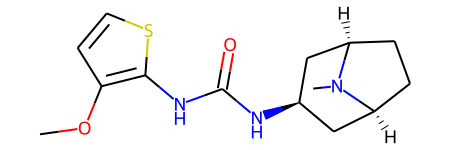

In [47]:
mols[0]

In [48]:
Descriptors.fr_imide(mols[0])

0

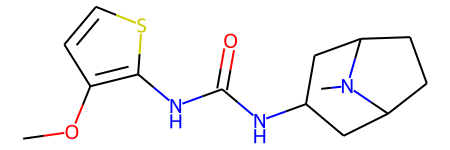

In [60]:
mols[0]

In [62]:
Descriptors.fr_phenol(m)

0

In [63]:
Descriptors.qed(m)

0.6106035394285075

* QED: https://www.nature.com/articles/nchem.1243 

* 얼마나 기존에 알려진 약과 유사한 물성을 가지고 있는가? (8가지의 물성에 기반해서) 
* MW, Hydrogenbond acceptor/donor 개수, rotatable bond 개수, ring 개수, logP 등등을 고려해서 
* 0~1 사이로 계산이 됨. 
* 0에 가까우면 기존에 알려진 약과 많이 다르다. 1에 가까우면 기존의 알려진 약과 유사한 물성을 가지고 있다. 

# 주어진 분자에서 rdkit에서 계산 가능한 실수(float)로 주어지는 descriptor들의 list를 return함. 

In [88]:
from rdkit import DataStructs
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.GraphDescriptors import (BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1,
                                         Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v,
                                         HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3)

from rdkit.Chem.EState.EState_VSA import (EState_VSA1, EState_VSA10, EState_VSA11, EState_VSA2, EState_VSA3,
                                          EState_VSA4, EState_VSA5, EState_VSA6, EState_VSA7, EState_VSA8, EState_VSA9,
                                          VSA_EState1, VSA_EState10, VSA_EState2, VSA_EState3, VSA_EState4, VSA_EState5,
                                          VSA_EState6, VSA_EState7, VSA_EState8, VSA_EState9,)

from rdkit.Chem.Descriptors import (ExactMolWt, MolWt, HeavyAtomMolWt, MaxAbsPartialCharge, MinPartialCharge,
                                    MaxPartialCharge, MinAbsPartialCharge, NumRadicalElectrons, NumValenceElectrons)

from rdkit.Chem.EState.EState import (MaxAbsEStateIndex, MaxEStateIndex, MinAbsEStateIndex, MinEStateIndex,)

from rdkit.Chem.Lipinski import (FractionCSP3, HeavyAtomCount, NHOHCount, NOCount, NumAliphaticCarbocycles,
                                 NumAliphaticHeterocycles, NumAliphaticRings, NumAromaticCarbocycles, NumAromaticHeterocycles,
                                 NumAromaticRings, NumHAcceptors, NumHDonors, NumHeteroatoms, RingCount,
                                 NumRotatableBonds, NumSaturatedCarbocycles, NumSaturatedHeterocycles, NumSaturatedRings,)

from rdkit.Chem.Crippen import (MolLogP, MolMR, )

from rdkit.Chem.MolSurf import (LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14,
                                PEOE_VSA2, PEOE_VSA3,PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9,
                                SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6,
                                SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12,
                                SlogP_VSA2, SlogP_VSA3,SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8,
                                SlogP_VSA9, TPSA, )

from rdkit.Chem.Fragments import (fr_Al_COO, fr_Al_OH, fr_Al_OH_noTert, fr_ArN, fr_Ar_COO, fr_Ar_N, fr_Ar_NH,
 fr_Ar_OH, fr_COO, fr_COO2, fr_C_O, fr_C_O_noCOO, fr_C_S, fr_HOCCN, fr_Imine, fr_NH0, fr_NH1,
 fr_NH2, fr_N_O, fr_Ndealkylation1, fr_Ndealkylation2, fr_Nhpyrrole, fr_SH, fr_aldehyde, fr_alkyl_carbamate,
 fr_alkyl_halide, fr_allylic_oxid, fr_amide, fr_amidine, fr_aniline, fr_aryl_methyl, fr_azide, fr_azo, fr_barbitur,
 fr_benzene, fr_benzodiazepine, fr_bicyclic, fr_diazo, fr_dihydropyridine, fr_epoxide, fr_ester, fr_ether, fr_furan,
 fr_guanido, fr_halogen, fr_hdrzine, fr_hdrzone, fr_imidazole, fr_imide, fr_isocyan, fr_isothiocyan, fr_ketone,
 fr_ketone_Topliss, fr_lactam, fr_lactone, fr_methoxy, fr_morpholine, fr_nitrile, fr_nitro, fr_nitro_arom,
 fr_nitro_arom_nonortho, fr_nitroso, fr_oxazole, fr_oxime, fr_para_hydroxylation, fr_phenol,
 fr_phenol_noOrthoHbond, fr_phos_acid, fr_phos_ester, fr_piperdine, fr_piperzine, fr_priamide, fr_prisulfonamd,
 fr_pyridine, fr_quatN, fr_sulfide, fr_sulfonamd, fr_sulfone, fr_term_acetylene, fr_tetrazole, fr_thiazole, fr_thiocyan,
 fr_thiophene, fr_unbrch_alkane, fr_urea)

def get_descriptors(mol):
    if mol is None:
        print("Molecule is None!")
        
    else:
        AllChem.ComputeGasteigerCharges(mol)
        finger = [
            BalabanJ(mol) , # 0
            BertzCT(mol) , # 1
            Chi0(mol) , # 2
            Chi0n(mol) , # 3
            Chi0v(mol) , # 4
            Chi1(mol) , # 5
            Chi1n(mol) , # 6
            Chi1v(mol) , # 7
            Chi2n(mol) ,
            Chi2v(mol) ,
            Chi3n(mol) ,
            Chi3v(mol) ,
            Chi4n(mol) ,
            Chi4v(mol) ,
            EState_VSA1(mol) ,
            EState_VSA10(mol) ,
            EState_VSA11(mol) ,
            EState_VSA2(mol) ,
            EState_VSA3(mol) ,
            EState_VSA4(mol) ,
            EState_VSA5(mol) ,
            EState_VSA6(mol) ,
            EState_VSA7(mol) ,
            EState_VSA8(mol) ,
                EState_VSA9(mol) ,
                ExactMolWt(mol) ,
                FractionCSP3(mol) ,
                HallKierAlpha(mol) ,
                HeavyAtomCount(mol) ,
                HeavyAtomMolWt(mol) ,
                # Ipc(mol) ,
                Kappa1(mol) ,
                Kappa2(mol) ,
                Kappa3(mol) ,
                LabuteASA(mol) ,
                MaxAbsEStateIndex(mol) ,
                MaxAbsPartialCharge(mol) ,
                MaxEStateIndex(mol) ,
                MaxPartialCharge(mol) ,
                MinAbsEStateIndex(mol) ,
                MinAbsPartialCharge(mol) ,
                MinEStateIndex(mol) ,
                MinPartialCharge(mol) ,
                MolLogP(mol) ,
                MolMR(mol) ,
                MolWt(mol) ,
                NHOHCount(mol) ,
                NOCount(mol) ,
                NumAliphaticCarbocycles(mol) ,
                NumAliphaticHeterocycles(mol) ,
                NumAliphaticRings(mol) ,
                NumAromaticCarbocycles(mol) ,
                NumAromaticHeterocycles(mol) ,
                NumAromaticRings(mol) ,
                NumHAcceptors(mol) ,
                NumHDonors(mol) ,
                NumHeteroatoms(mol) ,
                NumRadicalElectrons(mol) ,
                NumRotatableBonds(mol) ,
                NumSaturatedCarbocycles(mol) ,
                NumSaturatedHeterocycles(mol) ,
                NumSaturatedRings(mol) ,
                NumValenceElectrons(mol) ,
                PEOE_VSA1(mol) ,
                PEOE_VSA10(mol) ,
                PEOE_VSA11(mol) ,
                PEOE_VSA12(mol) ,
                PEOE_VSA13(mol) ,
                PEOE_VSA14(mol) ,
                PEOE_VSA2(mol) ,
                PEOE_VSA3(mol) ,
                PEOE_VSA4(mol) ,
                PEOE_VSA5(mol) ,
                PEOE_VSA6(mol) ,
                PEOE_VSA7(mol) ,
                PEOE_VSA8(mol) ,
                PEOE_VSA9(mol) ,
                RingCount(mol) ,
                SMR_VSA1(mol) ,
                SMR_VSA10(mol) ,
                SMR_VSA2(mol) ,
                SMR_VSA3(mol) ,
                SMR_VSA4(mol) ,
                SMR_VSA5(mol) ,
                SMR_VSA6(mol) ,
                SMR_VSA7(mol) ,
                SMR_VSA8(mol) ,
                SMR_VSA9(mol) ,
                SlogP_VSA1(mol) ,
                SlogP_VSA10(mol) ,
                SlogP_VSA11(mol) ,
                SlogP_VSA12(mol) ,
                SlogP_VSA2(mol) ,
                SlogP_VSA3(mol) ,
                SlogP_VSA4(mol) ,
                SlogP_VSA5(mol) ,
                SlogP_VSA6(mol) ,
                SlogP_VSA7(mol) ,
                SlogP_VSA8(mol) ,
                SlogP_VSA9(mol) ,
                TPSA(mol) ,
                VSA_EState1(mol) ,
                VSA_EState10(mol) ,
                VSA_EState2(mol) ,
                VSA_EState3(mol) ,
                VSA_EState4(mol) ,
                VSA_EState5(mol) ,
                VSA_EState6(mol) ,
                VSA_EState7(mol) ,
                VSA_EState8(mol) ,
                VSA_EState9(mol) ,
                fr_Al_COO(mol) ,
                fr_Al_OH(mol) ,
                fr_Al_OH_noTert(mol) ,
                fr_ArN(mol) ,
                fr_Ar_COO(mol) ,
                fr_Ar_N(mol) ,
                fr_Ar_NH(mol) ,
                fr_Ar_OH(mol) ,
                fr_COO(mol) ,
                fr_COO2(mol) ,
                fr_C_O(mol) ,
                fr_C_O_noCOO(mol) ,
                fr_C_S(mol) ,
                fr_HOCCN(mol) ,
                fr_Imine(mol) ,
                fr_NH0(mol) ,
                fr_NH1(mol) ,
                fr_NH2(mol) ,
                fr_N_O(mol) ,
                fr_Ndealkylation1(mol) ,
                fr_Ndealkylation2(mol) ,
                fr_Nhpyrrole(mol) ,
                fr_SH(mol) ,
                fr_aldehyde(mol) ,
                fr_alkyl_carbamate(mol) ,
                fr_alkyl_halide(mol) ,
                fr_allylic_oxid(mol) ,
                fr_amide(mol) ,
                fr_amidine(mol) ,
                fr_aniline(mol) ,
                fr_aryl_methyl(mol) ,
                fr_azide(mol) ,
                fr_azo(mol) ,
                fr_barbitur(mol) ,
                fr_benzene(mol) ,
                fr_benzodiazepine(mol) ,
                fr_bicyclic(mol) ,
                fr_diazo(mol) ,
                fr_dihydropyridine(mol) ,
                fr_epoxide(mol) ,
                fr_ester(mol) ,
                fr_ether(mol) ,
                fr_furan(mol) ,
                fr_guanido(mol) ,
                fr_halogen(mol) ,
                fr_hdrzine(mol) ,
                fr_hdrzone(mol) ,
                fr_imidazole(mol) ,
                fr_imide(mol) ,
                fr_isocyan(mol) ,
                fr_isothiocyan(mol) ,
                fr_ketone(mol) ,
                fr_ketone_Topliss(mol) ,
                fr_lactam(mol) ,
                fr_lactone(mol) ,
                fr_methoxy(mol) ,
                fr_morpholine(mol) ,
                fr_nitrile(mol) ,
                fr_nitro(mol) ,
                fr_nitro_arom(mol) ,
                fr_nitro_arom_nonortho(mol) ,
                fr_nitroso(mol) ,
                fr_oxazole(mol) ,
                fr_oxime(mol) ,
                fr_para_hydroxylation(mol) ,
                fr_phenol(mol) ,
                fr_phenol_noOrthoHbond(mol) ,
                fr_phos_acid(mol) ,
                fr_phos_ester(mol) ,
                fr_piperdine(mol) ,
                fr_piperzine(mol) ,
                fr_priamide(mol) ,
                fr_prisulfonamd(mol) ,
                fr_pyridine(mol) ,
                fr_quatN(mol) ,
                fr_sulfide(mol) ,
                fr_sulfonamd(mol) ,
                fr_sulfone(mol) ,
                fr_term_acetylene(mol) ,
                fr_tetrazole(mol) ,
                fr_thiazole(mol) ,
                fr_thiocyan(mol) ,
                fr_thiophene(mol),
                fr_unbrch_alkane(mol) ,
                fr_urea(mol) , #rdkit properties # 196
                ]
        return finger

In [89]:
import numpy as np
get_descriptors(mols[0])

[1.548170880239618,
 476.5184954685539,
 14.11251969619286,
 11.887136937585868,
 12.703633518513595,
 9.66903509559602,
 7.080107706855591,
 7.959760518110486,
 5.635355539020201,
 6.551471616855488,
 4.509529479208229,
 5.32064380272671,
 3.40336919062386,
 4.150242160482609,
 0.0,
 4.794537184071822,
 0.0,
 12.072955341486033,
 17.833193491579827,
 17.842725222539887,
 24.178429123786756,
 7.109797541277533,
 11.446429838927525,
 22.58115892154033,
 4.736862953800049,
 295.135447912,
 0.6428571428571429,
 -1.27,
 20,
 274.24,
 13.701138118584822,
 5.614496289002639,
 2.6225045846526736,
 122.84415059378621,
 12.077344576719577,
 0.4936554178529233,
 12.077344576719577,
 0.3196704720438742,
 0.12527494331065747,
 0.3196704720438742,
 -0.12527494331065747,
 -0.4936554178529233,
 2.503400000000001,
 80.62040000000005,
 295.408,
 2,
 5,
 0,
 2,
 2,
 0,
 1,
 1,
 4,
 2,
 6,
 0,
 3,
 0,
 2,
 2,
 110,
 14.953561288656857,
 5.001081976687867,
 5.749511833283905,
 0.0,
 0.0,
 6.03111451233807

In [79]:
result = get_descriptors(m)

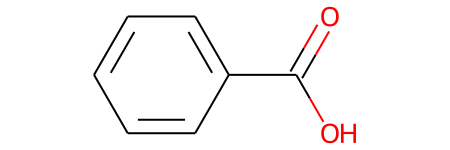

In [80]:
m

In [81]:
result

In [82]:
list(result)

TypeError: 'NoneType' object is not iterable